In [42]:
# Credits: https://github.com/Pariasrz/TSP-with-HillClimbing
import random
import numpy as np
import networkx as nx

#coordinate of the points/cities
coordinate = np.array([[1,2], [30,21], [56,23], [8,18], [20,50], [3,4], [11,6], [6,7],
                       [15,20], [10,9], [12,12], [46,17], [60,55], [100,80], [16,13]])

In [43]:
#adjacency matrix for a weighted graph based on the given coordinates
def generate_matrix(coordinate):
    matrix = []
    for i in range(len(coordinate)):
        for j in range(len(coordinate)) :
            p = np.linalg.norm(coordinate[i] - coordinate[j])
            matrix.append(p)
    matrix = np.reshape(matrix, (len(coordinate),len(coordinate)))
    #print(matrix)
    return matrix

#finds a random solution
def solution(matrix):
    points = list(range(0, len(matrix)))
    solution = []
    for i in range(0, len(matrix)):
        random_point = points[random.randint(0, len(points) - 1)]
        solution.append(random_point)
        points.remove(random_point)

    return solution


#computes the path based on the random solution
def path_length(matrix, solution):
    cycle_length = 0
    for i in range(0, len(solution)):
        cycle_length += matrix[solution[i]][solution[i - 1]]
    return cycle_length

In [44]:
#generate neighbors of the random solution by swapping cities and returns the best neighbor
def neighbors(matrix, solution):
    neighbors = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbor = solution.copy()
            neighbor[i] = solution[j]
            neighbor[j] = solution[i]
            neighbors.append(neighbor)

    #assume that the first neighbor in the list is the best neighbor
    best_neighbor = neighbors[0]
    best_path = path_length(matrix, best_neighbor)

    #check if there is a better neighbor
    for neighbor in neighbors:
        current_path = path_length(matrix, neighbor)
        if current_path < best_path:
            best_path = current_path
            best_neighbor = neighbor
    return best_neighbor, best_path

The solution is 
 [1, 11, 2, 13, 12, 4, 3, 7, 0, 5, 6, 9, 10, 14, 8] 
The path length is 
 284.13982461162027


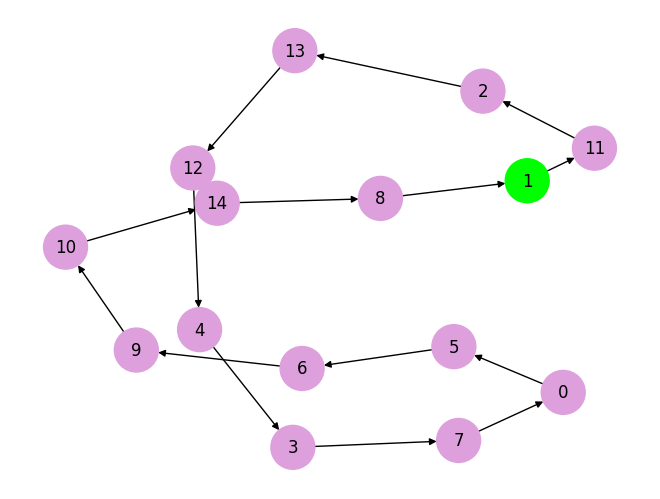

In [45]:
def hill_climbing(coordinate):
    global matrix
    matrix = generate_matrix(coordinate)

    current_solution = solution(matrix)
    current_path = path_length(matrix, current_solution)
    neighbor = neighbors(matrix,current_solution)[0]
    best_neighbor, best_neighbor_path = neighbors(matrix, neighbor)

    while best_neighbor_path < current_path:
        current_solution = best_neighbor
        current_path = best_neighbor_path
        neighbor = neighbors(matrix, current_solution)[0]
        best_neighbor, best_neighbor_path = neighbors(matrix, neighbor)

    return current_path, current_solution


def graph(coordinate):
    final_solution = hill_climbing(coordinate)
    G = nx.DiGraph()
    temp = final_solution[1]
    G.add_nodes_from(final_solution[1])

    for i in range(1, len(final_solution[1])):
        G.add_edge(temp[i - 1], temp[i])
    G.add_edge(temp[len(temp) - 1], temp[0])
    color_map = []
    for node in G:
        if node == final_solution[1][0]:
            color_map.append('lime')
        else:
            color_map.append('plum')
    nx.draw(G, with_labels = True, node_color = color_map, node_size = 1000)
    print("The solution is \n", final_solution[1], "\nThe path length is \n", final_solution[0])
    return


graph(coordinate)

In [46]:
!pip install pyeasyga
from pyeasyga import pyeasyga

In [47]:
from pyeasyga import pyeasyga
import random

# Create the initial individual (random path through cities)
def create_individual(data):
    individual = list(range(len(data)))  # cities 0 to n-1
    random.shuffle(individual)
    return individual

# Define the fitness function (total distance of the tour)
def fitness(individual, data):
    cycle_length = 0
    for i in range(0, len(individual)):
        cycle_length += data[individual[i]][individual[i - 1]]
    return cycle_length

# Define crossover (order crossover for TSP)
def crossover(parent_1, parent_2):
    child_1 = parent_1[:]
    child_2 = parent_2[:]

    start = random.randint(0, len(parent_1) - 2)
    end = random.randint(start + 1, len(parent_1) - 1)

    child_1_inheritance = parent_1[start:end]
    child_2_inheritance = parent_2[start:end]

    child_1 = [city for city in parent_2 if city not in child_1_inheritance]
    child_1[start:start] = child_1_inheritance

    child_2 = [city for city in parent_1 if city not in child_2_inheritance]
    child_2[start:start] = child_2_inheritance

    return child_1, child_2

# Define mutation (swap two cities)
def mutate(individual):
    i, j = random.sample(range(len(individual)), 2)
    individual[i], individual[j] = individual[j], individual[i]


The solution is 
 [0, 1, 5, 8, 11, 3, 9, 13, 6, 4, 14, 10, 2, 7, 12] 
The path length is 
 730.9937035868729


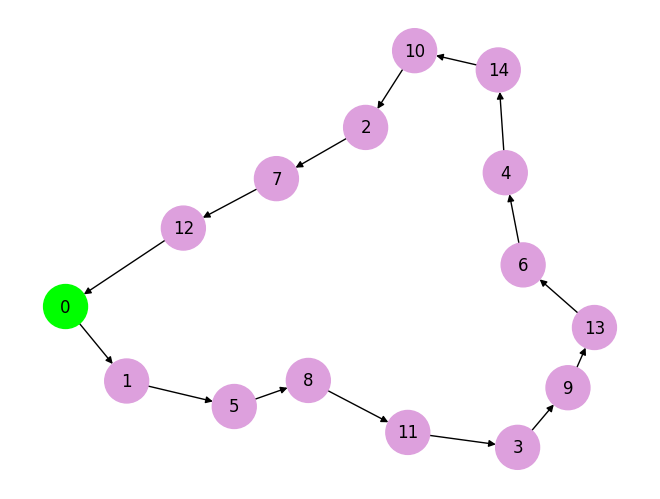

In [55]:
city_distances = matrix#generate_matrix(coordinate)

# Initialize the genetic algorithm with the TSP data (city indices)
ga = pyeasyga.GeneticAlgorithm(city_distances, population_size=10, generations=100, crossover_probability=0.8, mutation_probability=0.2, elitism=True)

# Add functions to the GA
ga.create_individual = create_individual
ga.fitness_function = fitness
ga.crossover_function = crossover
ga.mutate_function = mutate

# Run the GA
ga.run()

# Output the best solution
best_individual = ga.best_individual()

G = nx.DiGraph()
temp = best_individual[1]
G.add_nodes_from(best_individual[1])

for i in range(1, len(best_individual[1])):
    G.add_edge(temp[i - 1], temp[i])
G.add_edge(temp[len(temp) - 1], temp[0])
color_map = []
for node in G:
    if node == best_individual[1][0]:
        color_map.append('lime')
    else:
        color_map.append('plum')
nx.draw(G, with_labels = True, node_color = color_map, node_size = 1000)
print("The solution is \n", best_individual[1], "\nThe path length is \n", best_individual[0])

